In [155]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
data = pd.read_csv("../pl_stats.csv").sort_values(by='Rk', axis=0)

In [157]:
def_pressing_stats = ['Squad','Tkl','TklW','Def 3rd','Mid 3rd','Att 3rd','Tkl','Att','Tkl%','Lost','Blocks','Sh','Pass','Int','Tkl+Int','Clr','Err']

In [158]:
squad_names=data['Squad']

In [159]:
data_pressing = data.loc[:,def_pressing_stats]

In [160]:
shot_goal_creation_stats = ['Squad','SCA','SCA90','GCA','GCA90']

In [161]:
possession_stats = ['Poss','90s','Touches','Def Pen','Def 3rd','Mid 3rd','Att 3rd','Att Pen','Live','Att','Succ','Succ%','Tkld','Tkld%','Carries','TotDist','PrgDist','PrgC','1/3','CPA','Mis','Dis','Rec','PrgR']

In [162]:
data_possession = data.loc[:,possession_stats]

In [163]:
data_Shot_creation = data.loc[:,shot_goal_creation_stats]

In [164]:
data_pressing.columns, data_Shot_creation.columns

(Index(['Squad', 'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Tkl', 'Att',
        'Tkl%', 'Lost', 'Blocks', 'Sh', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err'],
       dtype='object'),
 Index(['Squad', 'SCA', 'SCA90', 'GCA', 'GCA90'], dtype='object'))

In [165]:
data_pressing_shot = data_pressing.merge(data_Shot_creation, on= 'Squad').set_index(squad_names).drop(['Squad'], axis=1)

In [166]:
data_pressing_shot.head()

,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl,Att,Tkl%,Lost,Blocks,Sh,Pass,Int,Tkl+Int,Clr,Err,SCA,SCA90,GCA,GCA90
Squad,,,,,,,,,,,,,,,,,,,,
Manchester City,471,272,185,198,88,471,287,45.9,250,339,95,244,223,694,402,9,1099,28.92,168,4.42
Arsenal,568,343,238,212,118,568,429,48.9,260,362,86,276,237,805,599,23,1045,27.50,150,3.95
Manchester Utd,658,400,343,231,84,658,449,50.3,297,496,146,350,352,1010,771,11,1051,27.66,99,2.61
Newcastle Utd,607,360,268,254,85,607,378,47.8,335,448,116,332,333,940,680,10,1008,26.53,106,2.79
Liverpool,590,370,228,250,112,590,285,43.4,367,350,74,276,333,923,568,20,1046,27.53,129,3.39


In [167]:
data_pressing_shot_corr = data_pressing_shot.corr()

<Axes: >

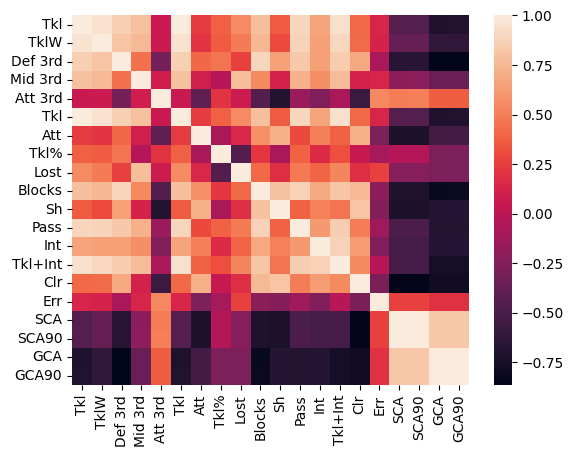

In [168]:
sns.heatmap(data_pressing_shot_corr)

In [169]:
data_pressing_shot_corr = data_pressing_shot_corr[abs(data_pressing_shot_corr)>0.65]

In [170]:
def_pressing_stats1 = ['Tkl','TklW','Def 3rd','Mid 3rd','Att 3rd','Tkl','Att','Tkl%','Lost','Blocks','Sh','Pass','Int','Tkl+Int','Clr','Err']
shot_goal_creation_stats1 = ['SCA','SCA90','GCA','GCA90']
correlated_features = data_pressing_shot_corr.loc[def_pressing_stats1,shot_goal_creation_stats1 ]

<Axes: >

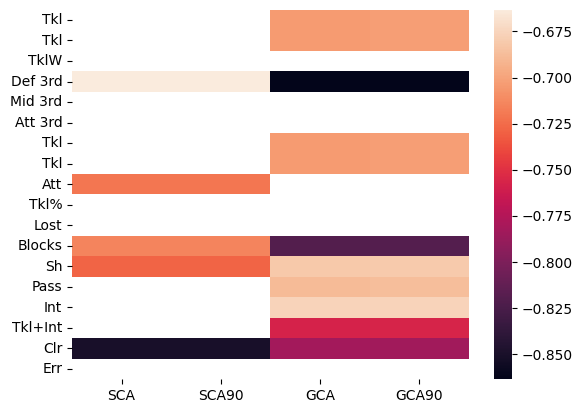

In [171]:
sns.heatmap(correlated_features)

In [172]:
correlated_features_df = correlated_features.stack().index
correlated_features_df=pd.DataFrame(correlated_features_df)

correlated_features_df

,0
0,"(Tkl, GCA)"
1,"(Tkl, GCA90)"
2,"(Tkl, GCA)"
3,"(Tkl, GCA90)"
4,"(Def 3rd, SCA)"
5,"(Def 3rd, SCA90)"
6,"(Def 3rd, GCA)"
7,"(Def 3rd, GCA90)"
8,"(Tkl, GCA)"
9,"(Tkl, GCA90)"


In [ ]:
def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True):

    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys())

In [174]:
data_pressing_shot['GCA_SCA_ratio'] = data_pressing_shot['GCA']/data_pressing_shot['SCA']

In [175]:
data_pressing_shot

,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl,Att,Tkl%,Lost,Blocks,...,Pass,Int,Tkl+Int,Clr,Err,SCA,SCA90,GCA,GCA90,GCA_SCA_ratio
Squad,,,,,,,,,,,,,,,,,,,,,
Manchester City,471,272,185,198,88,471,287,45.9,250,339,...,244,223,694,402,9,1099,28.92,168,4.42,0.152866
Arsenal,568,343,238,212,118,568,429,48.9,260,362,...,276,237,805,599,23,1045,27.50,150,3.95,0.143541
Manchester Utd,658,400,343,231,84,658,449,50.3,297,496,...,350,352,1010,771,11,1051,27.66,99,2.61,0.094196
Newcastle Utd,607,360,268,254,85,607,378,47.8,335,448,...,332,333,940,680,10,1008,26.53,106,2.79,0.105159
Liverpool,590,370,228,250,112,590,285,43.4,367,350,...,276,333,923,568,20,1046,27.53,129,3.39,0.123327
Brighton,616,340,270,242,104,616,279,47.4,295,392,...,288,303,919,432,15,1075,28.29,115,3.03,0.106977
Aston Villa,633,338,305,251,77,633,585,48.5,333,438,...,320,324,957,714,14,751,19.76,84,2.21,0.111851
Tottenham,619,353,325,215,79,619,342,47.9,299,428,...,280,340,959,762,20,910,23.95,116,3.05,0.127473
Brentford,587,337,270,228,89,587,882,42.2,346,456,...,288,341,928,822,14,702,18.47,98,2.58,0.139601


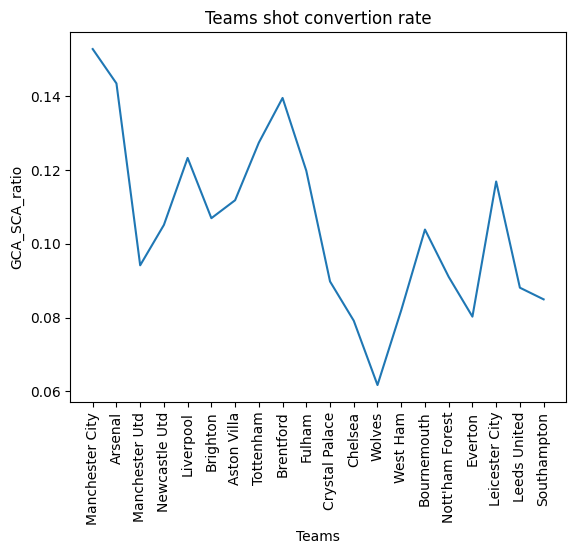

In [176]:
plt.plot(data_pressing_shot.index,data_pressing_shot["GCA_SCA_ratio"])
plt.xticks(rotation=90)
plt.ylabel("GCA_SCA_ratio")
plt.xlabel("Teams")
plt.title("Teams shot convertion rate")
plt.show()